Load Data and Initial Exploration

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Exploring the data to check all the categories
print(df.shape)
print(df.head())


print(df['Churn'].value_counts(normalize=True))

FileNotFoundError: [Errno 2] No such file or directory: 'Telco-Customer-Churn.csv'

Data Cleaning

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Feature Engineering & Encoding

In [ ]:
# Drop ID column
df = df.drop('customerID', axis=1)

# Binary encoding
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

Train / Test / Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

Model Training 1 Logistic Regression(Baseline Model)

Simple, interpretable

Good baseline

Coefficients tell us feature influence

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



C:\Users\asus\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 Random Forest (Ensemble Model)

Handles non-linear data well

Robust to outliers

Can give feature importance

Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



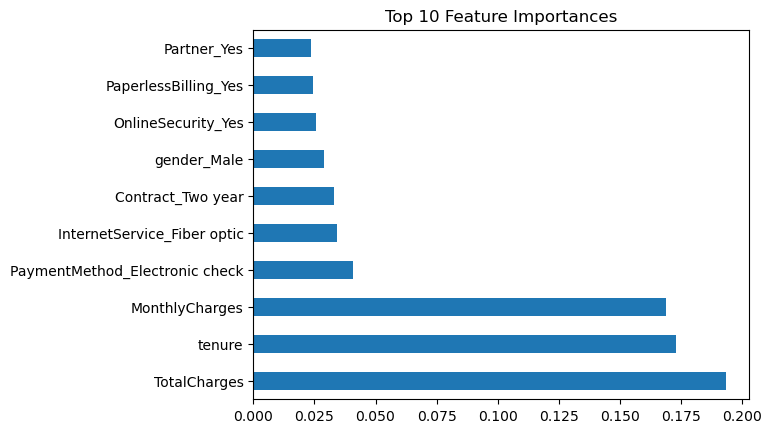

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


3 XGBoost (Boosted Trees)

High performance on tabular data

Handles class imbalance better

Often used in production-grade ML systems

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


In [ ]:
import joblib

joblib.dump(xgb_model, 'churn_model.pkl')

['churn_model.pkl']